In [1]:
#Carga de librerias
import glob
import pandas
import networkx
import numpy
import gc
import matplotlib.pyplot as plt
import folium
from folium import plugins
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#pyproj.pyproj_datadir = "/usr/share/proj/"
#from mpl_toolkits.basemap import Basemap as Basemap
def SufijoColumna(Data,suf):
    i=Data
    final=[]
    for c in i:
        final.append(c+suf)
    return final
pandas.options.display.float_format = '{:.2f}'.format # Configuramos separadores de miles y 2 decimales
#Carga de Datos
a=glob.glob("./EstadisticasRNDC_2019*")
municipios=pandas.read_excel("./Municipios_Dane_Ubicados.xlsx", header=0)
municipios_ori=pandas.read_excel("./Municipios_Dane_Ubicados.xlsx", header=0)
NameMunicipios=municipios_ori.columns
municipios_ori.columns =SufijoColumna(NameMunicipios,"_Ori")
municipios_dest=pandas.read_excel("./Municipios_Dane_Ubicados.xlsx", header=0)
NameMunicipios=municipios_dest.columns
municipios_dest.columns =SufijoColumna(NameMunicipios,"_Dest")
for b in a:
    A1=pandas.read_excel(b, header=0)
    A1["Tiempo"]=str(A1["MES"])
    try:
        A2=A2.append(A1,ignore_index=True,sort=True)
        print(b)
    except:
        A2=A1
        print("NO")
#Marcar posisiones de todos los municipios con el centroide ya determinado        
pos={}
for er in municipios.Id:
    pos[int(er)]=(municipios.Long2.loc[municipios['Id'] == er].values[0],municipios.lat.loc[municipios['Id'] == er].values[0])
A2.info()
municipios.info()

NO
./EstadisticasRNDC_201909.xlsx
./EstadisticasRNDC_201903.xlsx
./EstadisticasRNDC_201906.xlsx
./EstadisticasRNDC_201904.xlsx
./EstadisticasRNDC_201910.xlsx
./EstadisticasRNDC_201912.xlsx
./EstadisticasRNDC_201908.xlsx
./EstadisticasRNDC_201902.xlsx
./EstadisticasRNDC_201911.xlsx
./EstadisticasRNDC_201905.xlsx
./EstadisticasRNDC_201901.xlsx
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542918 entries, 0 to 1542917
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   CODMERCANCIA            1542918 non-null  object
 1   CODMUNICIPIODESTINO     1542918 non-null  int64 
 2   CODMUNICIPIOORIGEN      1542918 non-null  int64 
 3   CODOPERACIONTRANSPORTE  1542918 non-null  object
 4   CODTIPOCONTENEDOR       1542918 non-null  object
 5   COD_CONFIG_VEHICULO     1542172 non-null  object
 6   CONFIG_VEHICULO         1542172 non-null  object
 7   DEPARTAMENTODESTINO     1542918 non-null  object
 8 

In [2]:
A2

,CODMERCANCIA,CODMUNICIPIODESTINO,CODMUNICIPIOORIGEN,CODOPERACIONTRANSPORTE,CODTIPOCONTENEDOR,COD_CONFIG_VEHICULO,CONFIG_VEHICULO,DEPARTAMENTODESTINO,DEPARTAMENTOORIGEN,GALONES,...,MUNICIPIODESTINO,MUNICIPIOORIGEN,NATURALEZACARGA,OPERACIONTRANSPORTE,TIPOCONTENEDOR,Tiempo,VALORESPAGADOS,VIAJESLIQUIDOS,VIAJESTOTALES,VIAJESVALORCERO
0,001601,5400000,5001000,G,.,CA,Camioneta de 2 ejes,ANTIOQUIA,ANTIOQUIA,0,...,LA UNION ANTIOQUIA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,1162500,0,3,0
1,009980,25899000,5001000,G,.,CA,Camioneta de 2 ejes,CUNDINAMARCA,ANTIOQUIA,0,...,ZIPAQUIRA CUNDINAMARCA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,574500,0,1,0
2,009800,76834000,5001000,G,.,CA,Camioneta de 2 ejes,VALLE DEL CAUCA,ANTIOQUIA,0,...,TULUA VALLE DEL CAUCA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,2400000,0,3,0
3,009890,76109000,5001000,G,.,CA,Camioneta de 2 ejes,VALLE DEL CAUCA,ANTIOQUIA,0,...,BUENAVENTURA VALLE DEL CAUCA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,1400000,0,1,0
4,002710,5380000,5001000,G,.,CA,Camioneta de 2 ejes,ANTIOQUIA,ANTIOQUIA,0,...,LA ESTRELLA LA ESTRELLA ANTIOQUIA,MEDELLIN ANTIOQUIA,Carga Normal,General,.,0 201907\n1 201907\n2 ...,80000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542913,002202,20001000,8001000,G,.,4R4,Camión Rígido de 4 ejes Remolque de 4 ejes,CESAR,ATLANTICO,0,...,VALLEDUPAR CESAR,BARRANQUILLA ATLANTICO,Carga Normal,General,.,0 201901\n1 201901\n2 ...,4400000,0,3,0
1542914,002202,23001000,8001000,G,.,4R4,Camión Rígido de 4 ejes Remolque de 4 ejes,CORDOBA,ATLANTICO,0,...,MONTERIA CORDOBA,BARRANQUILLA ATLANTICO,Carga Normal,General,.,0 201901\n1 201901\n2 ...,2200000,0,1,0
1542915,002202,70771013,8001000,G,.,4R4,Camión Rígido de 4 ejes Remolque de 4 ejes,SUCRE,ATLANTICO,0,...,MONTERIA SUCRE SUCRE,BARRANQUILLA ATLANTICO,Carga Normal,General,.,0 201901\n1 201901\n2 ...,1500000,0,1,0
1542916,007010,8001000,20001000,G,.,4R4,Camión Rígido de 4 ejes Remolque de 4 ejes,ATLANTICO,CESAR,0,...,BARRANQUILLA ATLANTICO,VALLEDUPAR CESAR,Carga Normal,General,.,0 201901\n1 201901\n2 ...,3200000,0,3,0


In [3]:
A2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1542918 entries, 0 to 1542917
Data columns (total 24 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   CODMERCANCIA            1542918 non-null  object
 1   CODMUNICIPIODESTINO     1542918 non-null  int64 
 2   CODMUNICIPIOORIGEN      1542918 non-null  int64 
 3   CODOPERACIONTRANSPORTE  1542918 non-null  object
 4   CODTIPOCONTENEDOR       1542918 non-null  object
 5   COD_CONFIG_VEHICULO     1542172 non-null  object
 6   CONFIG_VEHICULO         1542172 non-null  object
 7   DEPARTAMENTODESTINO     1542918 non-null  object
 8   DEPARTAMENTOORIGEN      1542918 non-null  object
 9   GALONES                 1542918 non-null  int64 
 10  KILOGRAMOS              1542918 non-null  int64 
 11  KILOMETROS              1542918 non-null  int64 
 12  MERCANCIA               1542918 non-null  object
 13  MES                     1542918 non-null  int64 
 14  MUNICIPIODESTINO  

In [4]:
#Cambios en la base de datos
def CodigoDane(Completo):
    Completo=str(Completo)
    Tam=len(Completo)
    if Tam<6:
        Cortado=99999
    else:
        Cortado=int(Completo[:Tam-3])       
    return Cortado
def BuscadorGuacari(num):
    if num==76318:
        Temp=1
    else:
        return 0
    return Temp
def TemporizadorAge(Texto):
    Salida=str(Texto)[:4]
    return Salida
def TemporizadorMes(Texto):
    Salida=str(Texto)[4:]
    return Salida
def ConvInteger(temp):
    try:
        final=int(temp)
    except:
        final=0
    return final


A2["CODMUNICIPIOORIGEN2"]=A2["CODMUNICIPIOORIGEN"].apply(CodigoDane)
A2["CODMUNICIPIODESTINO2" ]=A2["CODMUNICIPIODESTINO" ].apply(CodigoDane)
A3=pandas.merge(A2, municipios_ori, left_on='CODMUNICIPIOORIGEN2', right_on='Id_Ori',how="left")
A4=pandas.merge(A3, municipios_dest, left_on='CODMUNICIPIODESTINO2', right_on='Id_Dest',how="left")
A4["Recorrido"]=A4["NOMBRE_DPT_Ori"]+"/"+A4["label_Ori"]+"_"+A4["NOMBRE_DPT_Dest"]+"/"+A4["label_Dest"]
A4["Age"]=A4["MES"].apply(TemporizadorAge)
A4["MesF"]=A4["MES"].apply(TemporizadorMes)
A4["Id_Ori2"]=A4["Id_Ori"].apply(ConvInteger)
A4["Id_Dest2"]=A4["Id_Dest"].apply(ConvInteger)
A4["Guacari_origen"]=A4["Id_Ori2"].apply(BuscadorGuacari)
A4["Guacari_destino"]=A4["Id_Dest2"].apply(BuscadorGuacari)
A4["DateComplete"]=A4["Age"]+"/"+A4["MesF"] +"/"+"01"
A4['DateComplete'] = pandas.to_datetime(A4['DateComplete'], format='%Y/%m/%d')

In [5]:
#Filtrado de informacion
A4=A4[["CODMERCANCIA","MERCANCIA","KILOGRAMOS","GALONES","MUNICIPIOORIGEN","Guacari_origen",'DateComplete',"DEPARTAMENTODESTINO"]]

In [6]:
A4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1543195 entries, 0 to 1543194
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   CODMERCANCIA         1543195 non-null  object        
 1   MERCANCIA            1543195 non-null  object        
 2   KILOGRAMOS           1543195 non-null  int64         
 3   GALONES              1543195 non-null  int64         
 4   MUNICIPIOORIGEN      1543195 non-null  object        
 5   Guacari_origen       1543195 non-null  int64         
 6   DateComplete         1543195 non-null  datetime64[ns]
 7   DEPARTAMENTODESTINO  1543195 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 106.0+ MB


In [7]:
numpy.sort(A4['DateComplete'].unique())

array(['2019-01-01T00:00:00.000000000', '2019-02-01T00:00:00.000000000',
       '2019-03-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-07-01T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-10-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2019-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [8]:
A4G = A4[A4['Guacari_origen'] == 1]
A4G['GALONES']=A4G['GALONES']*3.78541
A4G["PesoTotal"]=A4G['GALONES']+A4G["KILOGRAMOS"]
table = pandas.pivot_table(A4G, values=["PesoTotal",'GALONES',"PesoTotal"], index=['DateComplete','MERCANCIA'],aggfunc=numpy.sum)

/home/mario/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/mario/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
table2 = pandas.pivot_table(A4G, values=["PesoTotal"], index=['MERCANCIA',"CODMERCANCIA"],aggfunc=numpy.sum)
table2=table2.sort_values(by=["PesoTotal"], ascending=False)
Codigos=[i[1] for i in table2.index]

CodigosGua=['001701',
 '001703',
 '001702',
 '000409',
 '001005',
 '002940',
 '001704',
 '000105',
 '001102',
 '003105',
 '003101',
 '009800',
 '002302',
 '001105',
 '001208',
 '001904',
 '001517',
 '000306',
 '003103',
 '008701',
 '000207',
 '008517',
 '006902',
 '002309',
 '001212',
 '002505',
 '007326',
 '008531',
 '008716',
 '001207',
 '008530',
 '001001',
 '002303',
 '008423',
 '001511',
 '000901',
 '002508',
 '009304',
 '001106',
 '001006',
 '009602',
 '003802',
 '008430',
 '001008',
 '003102',
 '008703',
 '008480',
 '006903',
 '008509',
 '002403',
 '003917',
 '008536',
 '008525',
 '002839',
 '006502',
 '006908',
 '006801',
 '002301',
 '002402',
 '008537',
 '003923',
 '005203',
 '002101',
 '008113',
 '002931',
 '001201',
 '009403',
 '008426',
 '008432',
 '008710',
 '007207',
 '008501',
 '009503',
 '006307',
 '008428',
 '001209']
table2[:50]

,,PesoTotal
MERCANCIA,CODMERCANCIA,
AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMICAMENTE PURA; EN ESTADO SOLIDO,001701,93875731.79
MELAZA DE LA EXTRACCION O DEL REFINADO DEL AZUCAR,001703,17273690.00
LOS DEMAS AZUCARES; INCLUIDAS LA LACTOSA; LAMALTOSA; LA GLUCOSA Y LA FRUCTO,001702,3776500.00
MIEL NATURAL,000409,3318500.00
MAIZ,001005,2769928.08
PRODUCTOS VARIOS,009980,2735600.00
AZUCARES QUIMICAMENTE PUROS; CON EXCEPCION DE LA SACAROSA; LACTOSA; MALTOSA,002940,1730500.00
ARTICULOS DE CONFITERIA SIN CACAO (INCLUIDO EL CHOCOLATE BLANCO),001704,1338000.00
GALLOS; GALLINAS; PATOS; GANSOS; PAVOS Y PINTADAS DE LAS ESPECIES DOMESTICAS,000105,755000.00


PRODUCTOS VARIOS	009980
DESPERDICIOS Y DESECHOS ( CHATARRA ); DE FUNDICION; HIERRO O ACERO; LINGOTE	007204
MUDANZAS	009890
CONTENEDOR VACIO	009990	
MISCELANEOS CONTENIDOS EN PAQUETES ( PAQUETEO )	009880

In [10]:
A4['GALONES']=A4['GALONES']*3.78541
A4["PesoTotal"]=A4['GALONES']+A4["KILOGRAMOS"]
table2 = pandas.pivot_table(A4, values=["PesoTotal"], index=['MERCANCIA',"CODMERCANCIA"],aggfunc=numpy.sum)
table2=table2.sort_values(by=["PesoTotal"], ascending=False)[:50]
Codigos=[i[1] for i in table2.index]
CodigosNac=[
 '002709',
 '003816',
 '001005',
 '002523',
 '007010',
 '002203',
 '002202',
 '002701',
 '001006',
 '003802',
 '001701',
 '002517',
 '002309',
 '000901',
 '001511',
 '003105',
 '002704',
 '004415',
 '001001',
 '003101',
 '002304',
 '002601',
 '001201',
 '002201',
 '002515',
 '000207',
 '000401',
 '001101',
 '002106',
 '004808',
 '002501',
 '004402',
 '002520']

In [11]:
CodigosTot=CodigosNac+CodigosGua
CodigosTot=set(CodigosTot)

In [12]:
def BuscadorCod(num):
    if num in CodigosTot:
        Temp=1
    else:
        return 0
    return Temp
A4["MercanciasEval"]=A4["CODMERCANCIA"].apply(BuscadorCod) 
A4T = A4[A4["MercanciasEval"] == 1]

In [13]:
len(A4T["MUNICIPIOORIGEN"].unique())

1541

In [20]:
A4T[A4T["MUNICIPIOORIGEN"]=='GUACARI VALLE DEL CAUCA']

,CODMERCANCIA,MERCANCIA,KILOGRAMOS,GALONES,MUNICIPIOORIGEN,Guacari_origen,DateComplete,DEPARTAMENTODESTINO,PesoTotal,MercanciasEval
67703,003923,ARTICULOS PARA EL TRANSPORTE O ENVASADO; DE P...,10000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,CUNDINAMARCA,10000.00,1
67704,001701,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMI...,30000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,VALLE DEL CAUCA,30000.00,1
67705,001704,ARTICULOS DE CONFITERIA SIN CACAO (INCLUIDO EL...,10000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,TOLIMA,10000.00,1
67708,001701,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMI...,10000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,QUINDIO,10000.00,1
67709,003105,ABONOS MINERALES O QUIMICOS; CON DOS O TRES D...,10000,0.00,GUACARI VALLE DEL CAUCA,1,2019-07-01,NARINO,10000.00,1
...,...,...,...,...,...,...,...,...,...,...
1539496,001701,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMI...,2279300,0.00,GUACARI VALLE DEL CAUCA,1,2019-01-01,ATLANTICO,2279300.00,1
1539497,001701,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMI...,68000,0.00,GUACARI VALLE DEL CAUCA,1,2019-01-01,CUNDINAMARCA,68000.00,1
1539498,001703,MELAZA DE LA EXTRACCION O DEL REFINADO DEL AZUCAR,172500,0.00,GUACARI VALLE DEL CAUCA,1,2019-01-01,ANTIOQUIA,172500.00,1
1539499,001102,HARINA DE CEREALES; EXCEPTO DE TRIGO O DE MOR...,69000,0.00,GUACARI VALLE DEL CAUCA,1,2019-01-01,ANTIOQUIA,69000.00,1


In [16]:
A4T

,CODMERCANCIA,MERCANCIA,KILOGRAMOS,GALONES,MUNICIPIOORIGEN,Guacari_origen,DateComplete,DEPARTAMENTODESTINO,PesoTotal,MercanciasEval
2,009800,CONJUNTOS INDUSTRIALES EXPORTADOS DE CONFORMID...,3600,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,VALLE DEL CAUCA,3600.00,1
11,006902,LADRILLOS; PLACAS; BALDOSAS Y PIEZAS CERAMIC...,1000,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,ANTIOQUIA,1000.00,1
18,006307,LOS DEMAS ARTICULOS CONFECCIONADOS; INCLUIDOS...,2001,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,ANTIOQUIA,2001.00,1
26,001904,PRODUCTOS A BASE DE CEREALES OBTENIDOS PORINSU...,800,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,BOGOTA D. C.,800.00,1
31,002201,AGUA; INCLUIDA EL AGUA MINERAL NATURAL O ARTI...,1000,0.00,MEDELLIN ANTIOQUIA,0,2019-07-01,SANTANDER,1000.00,1
...,...,...,...,...,...,...,...,...,...,...
1543190,002202,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICAD...,84000,0.00,BARRANQUILLA ATLANTICO,0,2019-01-01,CESAR,84000.00,1
1543191,002202,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICAD...,28000,0.00,BARRANQUILLA ATLANTICO,0,2019-01-01,CORDOBA,28000.00,1
1543192,002202,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICAD...,28000,0.00,BARRANQUILLA ATLANTICO,0,2019-01-01,SUCRE,28000.00,1
1543193,007010,BOMBONAS; (DAMAJUANAS) BOTELLAS; FRASCOS; B...,76000,0.00,VALLEDUPAR CESAR,0,2019-01-01,ATLANTICO,76000.00,1


In [17]:
list(A4T["MUNICIPIOORIGEN"].unique())

['MEDELLIN ANTIOQUIA',
 'SANTAFE DE ANTIOQUIA ANTIOQUIA',
 'ANZA ANTIOQUIA',
 'BARBOSA ANTIOQUIA',
 'BELLO ANTIOQUIA',
 'CAUCASIA ANTIOQUIA',
 'CISNEROS ANTIOQUIA',
 'COPACABANA ANTIOQUIA',
 'ENVIGADO ANTIOQUIA',
 'GIRARDOTA ANTIOQUIA',
 'GUARNE ANTIOQUIA',
 'ITAGUI ANTIOQUIA',
 'LA ESTRELLA LA ESTRELLA ANTIOQUIA',
 'PUEBLORRICO ANTIOQUIA',
 'PUERTO BERRIO ANTIOQUIA',
 'RETIRO ANTIOQUIA',
 'RIONEGRO ANTIOQUIA',
 'SABANETA ANTIOQUIA',
 'YONDO ANTIOQUIA',
 'BARRANQUILLA ATLANTICO',
 'GALAPA ATLANTICO',
 'MALAMBO ATLANTICO',
 'PUERTO COLOMBIA ATLANTICO',
 'SOLEDAD ATLANTICO',
 'BOGOTA BOGOTA D. C.',
 'CARTAGENA BOLIVAR',
 'ARJONA BOLIVAR',
 'CANTAGALLO BOLIVAR',
 'VILLANUEVA BOLIVAR',
 'TUNJA BOYACA',
 'BUENAVISTA BOYACA',
 'DUITAMA BOYACA',
 'SOGAMOSO BOYACA',
 'TIBASOSA BOYACA',
 'MANIZALES CALDAS',
 'POPAYAN CAUCA',
 'GUACHENE CALOTO CAUCA',
 'MONDOMO SANTANDER DE QUILICHAO CAUCA',
 'VILLA RICA CAUCA',
 'VALLEDUPAR CESAR',
 'AGUACHICA CESAR',
 'BOSCONIA CESAR',
 'MONTERIA CORDOBA',
 'C

In [21]:
A5=A4T.pivot_table(index="MUNICIPIOORIGEN",columns="MERCANCIA", values="PesoTotal",fill_value=0)

In [ ]:
#A5.loc["ZIPAQUIRA CUNDINAMARCA"].values

In [33]:
pca = PCA(n_components=2).fit_transform(A5/A5.max())

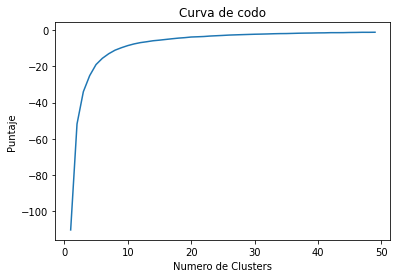

In [52]:
Nc = range(1, 50)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(pca).score(pca) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Puntaje')
plt.title('Curva de codo')
plt.show()

In [34]:
len(pca)

1541

In [53]:
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
A5["GroupPCA"]=kmeans.labels_

In [55]:
A5.loc['GUACARI VALLE DEL CAUCA']

MERCANCIA
ABONOS DE ORIGEN ANIMAL O VEGETAL;  INCLUSO MEZCLADOS ENTRE SI O TRATADOS QUIM   11947.92
ABONOS MINERALES O QUIMICOS FOSFATADOS                                           15333.33
ABONOS MINERALES O QUIMICOS NITROGENADOS                                          9666.67
ABONOS MINERALES O QUIMICOS;  CON DOS O TRES DE LOS ELEMENTOS FERTILIZANTES NI   17851.72
ACEITE DE PALMA Y SUS FRACCIONES;  INCLUSO REFINADO;  PERO SIN MODIFICAR QUIMI   35000.00
                                                                                   ...   
TRIGO Y MORCAJO O TRANQUILLON                                                     9800.00
TUBOS Y ACCESORIOS DE TUBERIA (POR EJEMPLO JUNTAS;  CODOS O RACORES);  DE PLAS   20000.00
YESO NATURAL; ANHIDRITA; YESOS CALCINADOS;  INCLUSO COLOREADOS O CON PEQUE?AS        0.00
[CERMETS]Y SUS MANUFACTURAS ;  INCLUIDOS LOS DESPERDICIOS Y DESECHOS              9000.00
GroupPCA                                                                             3.00


In [64]:
A5[A5["GroupPCA"]==3.0]

MERCANCIA,ABONOS DE ORIGEN ANIMAL O VEGETAL; INCLUSO MEZCLADOS ENTRE SI O TRATADOS QUIM,ABONOS MINERALES O QUIMICOS FOSFATADOS,ABONOS MINERALES O QUIMICOS NITROGENADOS,ABONOS MINERALES O QUIMICOS; CON DOS O TRES DE LOS ELEMENTOS FERTILIZANTES NI,ACEITE DE PALMA Y SUS FRACCIONES; INCLUSO REFINADO; PERO SIN MODIFICAR QUIMI,ACEITES CRUDOS DE PETROLEO O DE MINERALES BITUMINOSOS,ADOQUINES; ENCINTADO ( BORDILLOS ) Y LOSAS PARA PAVIMENTOS; DE PIEDRA NATURA,AGUA; INCLUIDA EL AGUA MINERAL NATURAL O ARTIFICIAL Y LA GASIFICADA; SIN AZU,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICADA; AZUCARADA; EDULCORADA DE OT,ALFORFON; MIJO Y ALPISTE; LOS DEMAS CEREALES,ALGARROBAS; ALGAS; REMOLACHA AZUCARERA Y CA?A DE AZUCAR; FRESCAS; REFRIGER,ALGODON CARDADO O PEINADO,APARATOS E INSTRUMENTOS PARA PESAR; INCLUIDAS LAS BASCULAS Y BALANZAS PARA L,APARATOS ELECTRICOS DE SE?ALIZACION (EXCEPTO LOS DE TRANSMISION DE MENSAJES),APARATOS ELECTRICOS DE SE?ALIZACION ACUSTICA O VISUAL (POR EJEMPLO SONERIAS;,APARATOS ELECTRICOS DE TELEFONIA O TELEGRAFIA CON HILOS; INCLUIDOS LOS TELEFO,APARATOS ELECTROMECANICOS CON MOTOR ELECTRICO INCORPORADO; DE USO DOMESTICO,APARATOS EMISORES DE RADIOTELEFONIA; RADIOTELEGRAFIA; RADIODIFUSION O TELEVI,APARATOS PARA EL CORTE; SECCIONAMIENTO; PROTECCION; DERIVACION; EMPALME O,ARENAS NATURALES DE CUALQUIER CLASE; INCLUSO COLOREADAS; CON EXCLUSION DE LA,ARROZ,ARTICULOS DE CONFITERIA SIN CACAO (INCLUIDO EL CHOCOLATE BLANCO),ARTICULOS PARA EL TRANSPORTE O ENVASADO; DE PLASTICO; TAPONES; TAPAS; CAPSU,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMICAMENTE PURA; EN ESTADO SOLIDO,AZUCARES QUIMICAMENTE PUROS; CON EXCEPCION DE LA SACAROSA; LACTOSA; MALTOSA,BOMBONAS; (DAMAJUANAS) BOTELLAS; FRASCOS; BOCALES; TARROS; ENVASES TUBULA,CAFE; INCLUSO TOSTADO O DESCAFEINADO; CASCARA O CASCARILLA DE CAFE; SUCEDANEO,CAJAS DE FUNDICION; PLACAS DE FONDO PARA MOLDES; MODELOS PARA MOLDES; MOLDES P,CAJONES; CAJAS; JAULAS; TAMBORES Y ENVASES SIMILARES; DE MADERA; CARRETES,CANTOS; GRAVA; PIEDRAS MACHACADAS; DE LOS TIPOS GENERALMENTE UTILIZADOS PAR,CARBON VEGETAL (INCLUIDO EL DE CASCARAS O DE HUESOS DE FRUTAS); AUNQUE ESTE A,CARBONES ACTIVADOS; MATERIAS MINERALES NATURALES ACTIVADAS; NEGRO DE ORIGEN AN,CARNE Y DESPOJOS COMESTIBLES DE AVES DE LA PARTIDA 0 1;0 5; FRESCOS; REFRIGERD,CARROS Y AUTOMOVILES BLINDADOS DE COMBATE; INCLUSO ARMADOS; PARTES,CASCOS PARA SOMBREROS; TRENZADOS O FABRICADOS POR UNION DE TIRAS DE CUALQUIE,CEMENTOS HIDRAULICOS (INCLUIDOS LOS CEMENTOS SIN PULVERIZAR O CLINKER); AUNQU,CEMENTOS; MORTEROS; HORMIGONES Y PREPARACIONES SIMILARES; REFRACTARIOS; EX,CERVEZA DE MALTA,CIGARROS O PUROS (INCLUSO DESPUNTADOS); PURITOS Y CIGARRILLOS; DE TABACO O D,COCHES DE TURISMO Y DEMAS VEHICULOS AUTOMOVILES PROYECTADOS PRINCIPALMENTE PAR,CONJUNTOS INDUSTRIALES EXPORTADOS DE CONFORMIDAD CON EL REGLAMNETO (CEE) N? 518/,"COQUES Y SEMICOQUES DE HULLA, DE LIGNITO O DE TURBA, INCLUSO ALGOMERADOS; CARBON DE RETORTA.",CRUSTACEOS; INCLUSO PELADOS; VIVOS; FRESCOS; REFRIGERADOS; CONGELADOS; SECOS;,CUADROS; PANELES; ARMARIOS Y DEMAS SOPORTES EQUIPADOS CON VARIOS APARATOS D,EXTRACTOS; ESENCIAS Y CONCENTRADOS DE CAFE; TE O YERBA MATE Y PREPARACIONES,GALLOS; GALLINAS; PATOS; GANSOS; PAVOS Y PINTADAS DE LAS ESPECIES DOMESTICAS,GRUAS Y APARATOS DE ELEVACION SOBRE CABLE AEREO; PUENTES RODANTES; PORTICOS D,HABAS(POROTOS; FRIJOLES) DE SOJA (SOYA) INCLUSO QUEBRANTADAS,HARINA DE CEREALES; EXCEPTO DE TRIGO O DE MORCAJO O TRANQUILLON,HARINA DE SEMILLAS O DE FRUTOS OLEAGINOSOS; EXCEPTO LA HARINA DE MOSTAZA,HARINA DE TRIGO O MORCAJO,HARINA; POLVO Y <PELLETS>; DE CARNE; DE DESPOJOS; DE PESCADO O DE CRUSTACE,HARINA; SEMOLA Y POLVO DE LAS LEGUMBRES SECAS DE LA PARTIDA 0713; DE SAGU O,HARINA; SEMOLA; POLVO; COPOS; GRANULOS Y <PELLETS> DE PATATAS (PAPAS),"HULLAS: BRIQUETAS, OVOIDES Y COMBUSTIBLES SOLIDOS SIMILARES, OBTENIDOS DE LA HULLA (CARBON)",LADRILLOS; PLACAS; BALDOSAS Y PIEZAS CERAMICAS ANALOGAS DE CONSTRUCCION; RE,LAS DEMAS ARCILLAS (CON EXCLUSION DE LAS ARCILLAS DILATADAS DE LA PARTI

La competencia mas cercana a nivel de lo que produce Guacari son,YUMBO VALLE DEL CAUCA	, SANTA MARTA MAGDALENA	, PALMIRA VALLE DEL CAUCA,GUADALAJARA DE BUGA VALLE DEL CAUCA,CARTAGENA BOLIVAR,CALI VALLE DEL CAUCA, BARRANQUILLA ATLANTICO

In [67]:
A6=A5[A5["GroupPCA"]==3.0]
A7=A6/A6.loc['GUACARI VALLE DEL CAUCA']
A7

MERCANCIA,ABONOS DE ORIGEN ANIMAL O VEGETAL; INCLUSO MEZCLADOS ENTRE SI O TRATADOS QUIM,ABONOS MINERALES O QUIMICOS FOSFATADOS,ABONOS MINERALES O QUIMICOS NITROGENADOS,ABONOS MINERALES O QUIMICOS; CON DOS O TRES DE LOS ELEMENTOS FERTILIZANTES NI,ACEITE DE PALMA Y SUS FRACCIONES; INCLUSO REFINADO; PERO SIN MODIFICAR QUIMI,ACEITES CRUDOS DE PETROLEO O DE MINERALES BITUMINOSOS,ADOQUINES; ENCINTADO ( BORDILLOS ) Y LOSAS PARA PAVIMENTOS; DE PIEDRA NATURA,AGUA; INCLUIDA EL AGUA MINERAL NATURAL O ARTIFICIAL Y LA GASIFICADA; SIN AZU,AGUA; INCLUIDA EL AGUA MINERAL Y LA GASIFICADA; AZUCARADA; EDULCORADA DE OT,ALFORFON; MIJO Y ALPISTE; LOS DEMAS CEREALES,ALGARROBAS; ALGAS; REMOLACHA AZUCARERA Y CA?A DE AZUCAR; FRESCAS; REFRIGER,ALGODON CARDADO O PEINADO,APARATOS E INSTRUMENTOS PARA PESAR; INCLUIDAS LAS BASCULAS Y BALANZAS PARA L,APARATOS ELECTRICOS DE SE?ALIZACION (EXCEPTO LOS DE TRANSMISION DE MENSAJES),APARATOS ELECTRICOS DE SE?ALIZACION ACUSTICA O VISUAL (POR EJEMPLO SONERIAS;,APARATOS ELECTRICOS DE TELEFONIA O TELEGRAFIA CON HILOS; INCLUIDOS LOS TELEFO,APARATOS ELECTROMECANICOS CON MOTOR ELECTRICO INCORPORADO; DE USO DOMESTICO,APARATOS EMISORES DE RADIOTELEFONIA; RADIOTELEGRAFIA; RADIODIFUSION O TELEVI,APARATOS PARA EL CORTE; SECCIONAMIENTO; PROTECCION; DERIVACION; EMPALME O,ARENAS NATURALES DE CUALQUIER CLASE; INCLUSO COLOREADAS; CON EXCLUSION DE LA,ARROZ,ARTICULOS DE CONFITERIA SIN CACAO (INCLUIDO EL CHOCOLATE BLANCO),ARTICULOS PARA EL TRANSPORTE O ENVASADO; DE PLASTICO; TAPONES; TAPAS; CAPSU,AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMICAMENTE PURA; EN ESTADO SOLIDO,AZUCARES QUIMICAMENTE PUROS; CON EXCEPCION DE LA SACAROSA; LACTOSA; MALTOSA,BOMBONAS; (DAMAJUANAS) BOTELLAS; FRASCOS; BOCALES; TARROS; ENVASES TUBULA,CAFE; INCLUSO TOSTADO O DESCAFEINADO; CASCARA O CASCARILLA DE CAFE; SUCEDANEO,CAJAS DE FUNDICION; PLACAS DE FONDO PARA MOLDES; MODELOS PARA MOLDES; MOLDES P,CAJONES; CAJAS; JAULAS; TAMBORES Y ENVASES SIMILARES; DE MADERA; CARRETES,CANTOS; GRAVA; PIEDRAS MACHACADAS; DE LOS TIPOS GENERALMENTE UTILIZADOS PAR,CARBON VEGETAL (INCLUIDO EL DE CASCARAS O DE HUESOS DE FRUTAS); AUNQUE ESTE A,CARBONES ACTIVADOS; MATERIAS MINERALES NATURALES ACTIVADAS; NEGRO DE ORIGEN AN,CARNE Y DESPOJOS COMESTIBLES DE AVES DE LA PARTIDA 0 1;0 5; FRESCOS; REFRIGERD,CARROS Y AUTOMOVILES BLINDADOS DE COMBATE; INCLUSO ARMADOS; PARTES,CASCOS PARA SOMBREROS; TRENZADOS O FABRICADOS POR UNION DE TIRAS DE CUALQUIE,CEMENTOS HIDRAULICOS (INCLUIDOS LOS CEMENTOS SIN PULVERIZAR O CLINKER); AUNQU,CEMENTOS; MORTEROS; HORMIGONES Y PREPARACIONES SIMILARES; REFRACTARIOS; EX,CERVEZA DE MALTA,CIGARROS O PUROS (INCLUSO DESPUNTADOS); PURITOS Y CIGARRILLOS; DE TABACO O D,COCHES DE TURISMO Y DEMAS VEHICULOS AUTOMOVILES PROYECTADOS PRINCIPALMENTE PAR,CONJUNTOS INDUSTRIALES EXPORTADOS DE CONFORMIDAD CON EL REGLAMNETO (CEE) N? 518/,"COQUES Y SEMICOQUES DE HULLA, DE LIGNITO O DE TURBA, INCLUSO ALGOMERADOS; CARBON DE RETORTA.",CRUSTACEOS; INCLUSO PELADOS; VIVOS; FRESCOS; REFRIGERADOS; CONGELADOS; SECOS;,CUADROS; PANELES; ARMARIOS Y DEMAS SOPORTES EQUIPADOS CON VARIOS APARATOS D,EXTRACTOS; ESENCIAS Y CONCENTRADOS DE CAFE; TE O YERBA MATE Y PREPARACIONES,GALLOS; GALLINAS; PATOS; GANSOS; PAVOS Y PINTADAS DE LAS ESPECIES DOMESTICAS,GRUAS Y APARATOS DE ELEVACION SOBRE CABLE AEREO; PUENTES RODANTES; PORTICOS D,HABAS(POROTOS; FRIJOLES) DE SOJA (SOYA) INCLUSO QUEBRANTADAS,HARINA DE CEREALES; EXCEPTO DE TRIGO O DE MORCAJO O TRANQUILLON,HARINA DE SEMILLAS O DE FRUTOS OLEAGINOSOS; EXCEPTO LA HARINA DE MOSTAZA,HARINA DE TRIGO O MORCAJO,HARINA; POLVO Y <PELLETS>; DE CARNE; DE DESPOJOS; DE PESCADO O DE CRUSTACE,HARINA; SEMOLA Y POLVO DE LAS LEGUMBRES SECAS DE LA PARTIDA 0713; DE SAGU O,HARINA; SEMOLA; POLVO; COPOS; GRANULOS Y <PELLETS> DE PATATAS (PAPAS),"HULLAS: BRIQUETAS, OVOIDES Y COMBUSTIBLES SOLIDOS SIMILARES, OBTENIDOS DE LA HULLA (CARBON)",LADRILLOS; PLACAS; BALDOSAS Y PIEZAS CERAMICAS ANALOGAS DE CONSTRUCCION; RE,LAS DEMAS ARCILLAS (CON EXCLUSION DE LAS ARCILLAS DILATADAS DE LA PARTI

pandas.options.display.max_columns= None
A7.describe()[:]

Sectores interesantes:
    Con respecto a nuestra competencia:
    ALGODON CARDADO O PEINADO
   APARATOS ELECTRICOS DE TELEFONIA O TELEGRAFIA CON HILOS; INCLUIDOS LOS TELEFO
AZUCAR DE CA?A O DE REMOLACHA Y SACAROSA QUIMICAMENTE PURA; EN ESTADO SOLIDO
CAJAS DE FUNDICION; PLACAS DE FONDO PARA MOLDES; MODELOS PARA MOLDES; MOLDES P
CASCOS PARA SOMBREROS; TRENZADOS O FABRICADOS POR UNION DE TIRAS DE CUALQUIE
CIGARROS O PUROS (INCLUSO DESPUNTADOS); PURITOS Y CIGARRILLOS; DE TABACO O D
CRUSTACEOS; INCLUSO PELADOS; VIVOS; FRESCOS; REFRIGERADOS; CONGELADOS; SECOS;
CUADROS; PANELES; ARMARIOS Y DEMAS SOPORTES EQUIPADOS CON VARIOS APARATOS D
GALLOS; GALLINAS; PATOS; GANSOS; PAVOS Y PINTADAS DE LAS ESPECIES DOMESTICAS
HARINA; SEMOLA Y POLVO DE LAS LEGUMBRES SECAS DE LA PARTIDA 0713; DE SAGU O
HARINA DE CEREALES; EXCEPTO DE TRIGO O DE MORCAJO O TRANQUILLON
LAS DEMAS ARCILLAS (CON EXCLUSION DE LAS ARCILLAS DILATADAS DE LA PARTIDA 6806
LOS DEMAS TABACOS Y SUCEDANEOS DEL TABACO; ELABORADOS; TABACO HOMOGENEIZADO
  MARGARINA; MEZCLAS O PREPARACIONES ALIMENTICIAS DE GRASAS O DE ACEITES; ANIMA	
  MARMOL; TRAVERTINOS; ECAUSSINES Y DEMAS PIEDRASCALIZAS DE TALLA O DE 
LAS DEMAS ARMAS (POR EJEMPLO ARMAS LARGAS Y PISTOLAS DE MUELLE; (RESORTES);	LAS DEMAS MANUFACTURAS DE HIERRO O DE 
    APARATOS ELECTRICOS DE SE?ALIZACION ACUSTICA O VISUAL (POR EJEMPLO SONERIAS;
    APARATOS ELECTRICOS DE SE?ALIZACION (EXCEPTO LOS DE TRANSMISION DE MENSAJES)
    APARATOS E INSTRUMENTOS PARA PESAR; INCLUIDAS LAS BASCULAS Y BALANZAS PARA L
    ACEITE DE PALMA Y SUS FRACCIONES; INCLUSO REFINADO; PERO SIN MODIFICAR QUIMI
    TUBOS Y ACCESORIOS DE TUBERIA (POR EJEMPLO JUNTAS; CODOS O RACORES); DE PLAS